## EDA of Mental Health Data

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [34]:
data = pd.read_csv(r'survey.csv')
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [17]:
missing_values = data.isnull().sum()
missing_values

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
data.drop(columns=['Timestamp','state', 'comments','Country'], inplace = True)


In [37]:
from pprint import pprint 

age_groups = data['Age'].unique()
gender_notations = data['Gender'].unique()

pprint(f"The dataset contains different age groups including: \n{', '.join(map(str, age_groups))}\n")
print("\n")
pprint(f"The different gender notations used in our dataset are: \n{', '.join(gender_notations)}")


('The dataset contains different age groups including: \n'
 '37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40, 38, 50, '
 '24, 18, 28, 26, 22, 19, 25, 45, 21, -29, 43, 56, 60, 54, 329, 55, '
 '99999999999, 48, 20, 57, 58, 47, 62, 51, 65, 49, -1726, 5, 53, 61, 8, 11, '
 '-1, 72\n')


('The different gender notations used in our dataset are: \n'
 'Female, M, Male, male, female, m, Male-ish, maile, Trans-female, Cis Female, '
 'F, something kinda male?, Cis Male, Woman, f, Mal, Male (CIS), '
 'queer/she/they, non-binary, Femake, woman, Make, Nah, All, Enby, fluid, '
 'Genderqueer, Female , Androgyne, Agender, cis-female/femme, Guy (-ish) ^_^, '
 'male leaning androgynous, Male , Man, Trans woman, msle, Neuter, Female '
 '(trans), queer, Female (cis), Mail, cis male, A little about you, Malr, p, '
 'femail, Cis Man, ostensibly male, unsure what that really means')


In [38]:
data.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

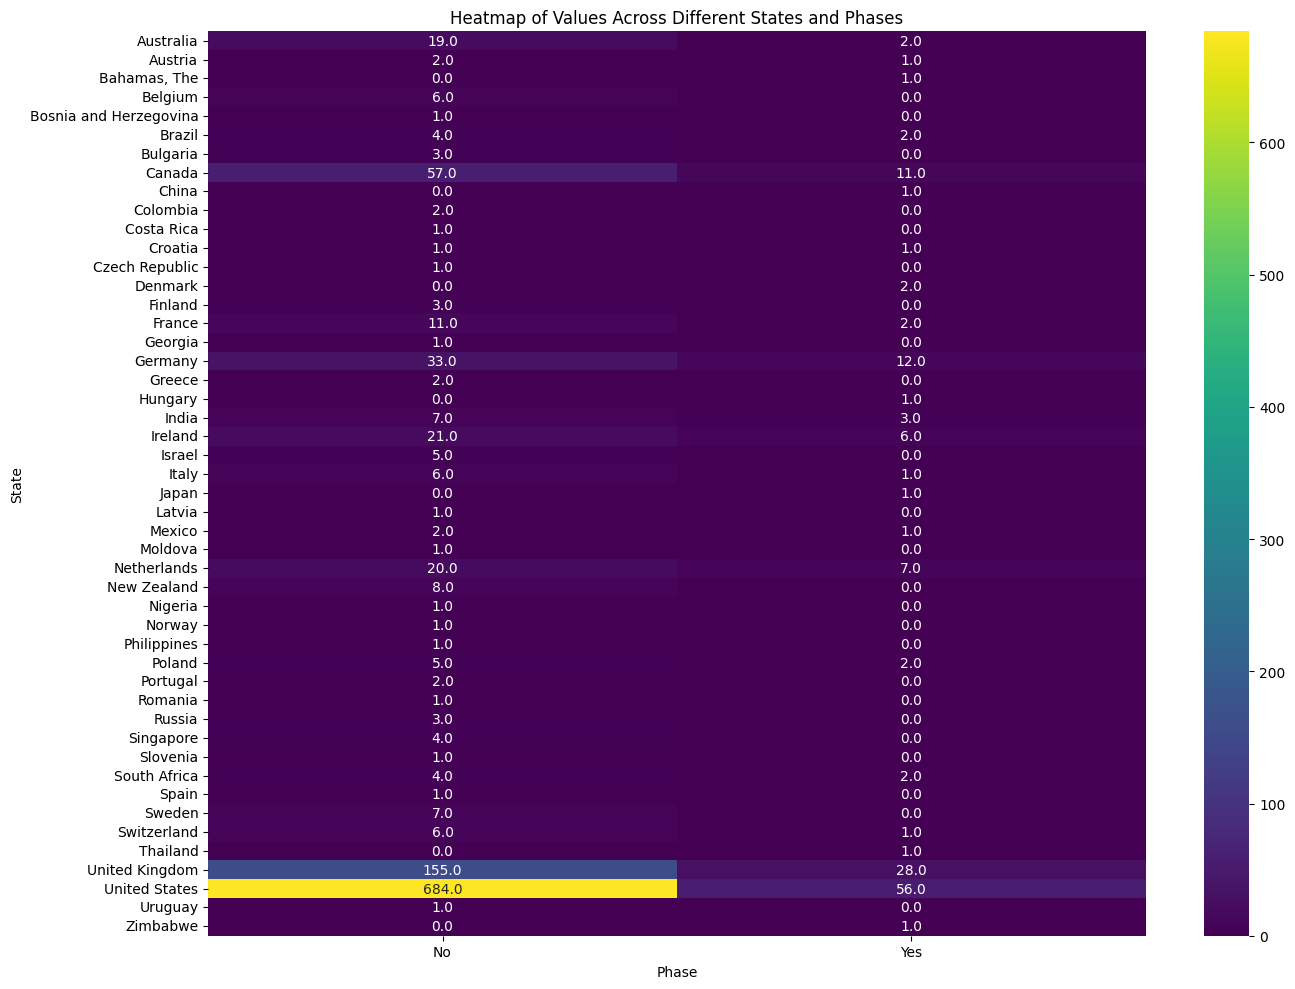

In [44]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# Create a pivot table for the heatmap
# Create a pivot table
# Create pivot table
pivot_table = pd.pivot_table(data, 
                             index=['Country'], 
                             columns=['self_employed'], 
                             aggfunc='size', 
                             fill_value=0)

# Heatmap of Values Across Different States and Phases
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".1f")
plt.title('Heatmap of Values Across Different States and Phases')
plt.xlabel('Phase')
plt.ylabel('State')
plt.tight_layout()
plt.show()

Based on the observation that the United States has the highest count (684) and the United Kingdom has a significant count (155), while other countries have counts below 50 or close to zero, an inference could be made about the distribution or focus of the dataset.
The low counts or near-zero values for other countries might indicate either limited data availability or less representation of these regions in the dataset. This discrepancy could influence the generalizability of any conclusions drawn from the dataset, emphasizing the need for cautious interpretation and possibly additional data collection from other regions to ensure a more balanced and representative analysis.

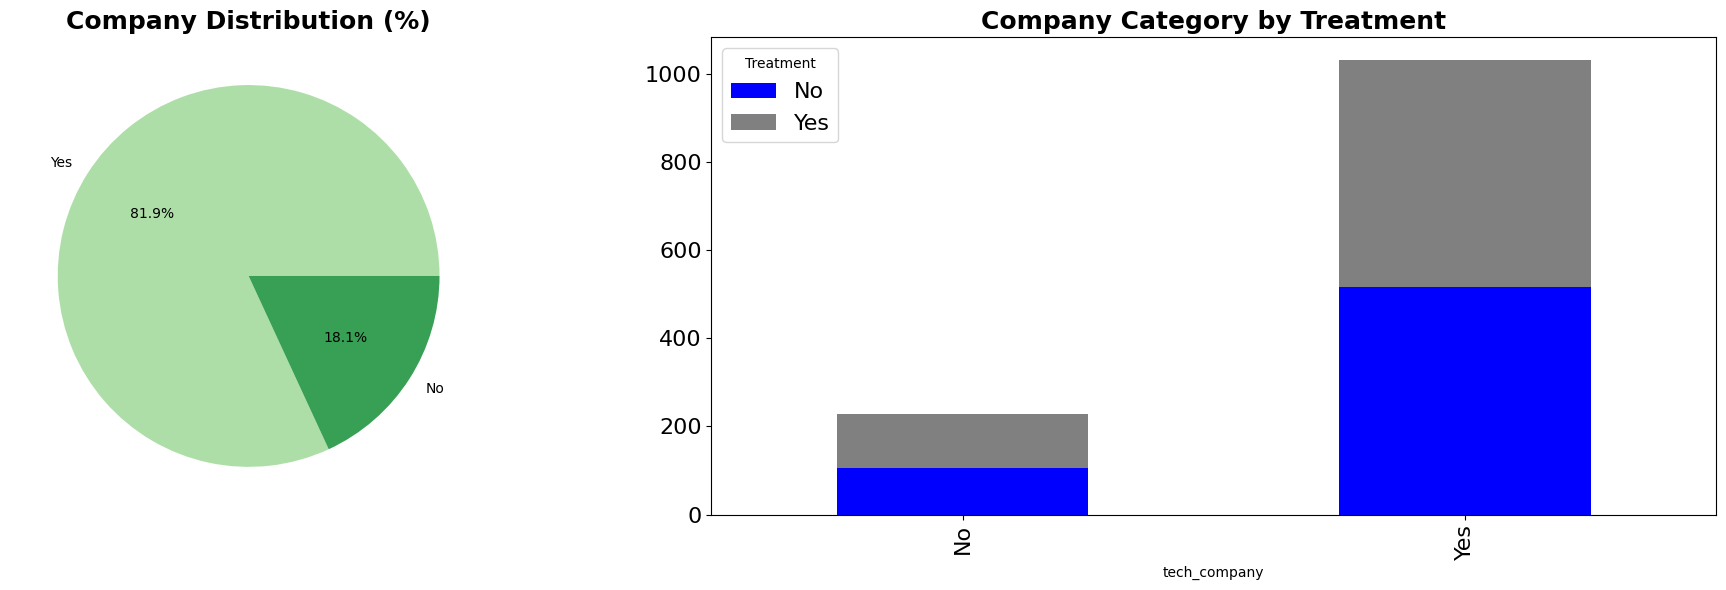

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Set up the figure and axes
plt.figure(figsize=(20, 6))

# Pie chart
plt.subplot(1, 2, 1)
eda_percentage = data['tech_company'].value_counts(normalize=True).rename_axis('tech_company').reset_index(name='Percentage')
plt.pie(eda_percentage['Percentage'], labels=eda_percentage['tech_company'], autopct='%1.1f%%', colors=sns.color_palette('Greens', len(eda_percentage)))
plt.title('Company Distribution (%)', fontsize=18, fontweight='bold')

# Stacked bar chart
plt.subplot(1, 2, 2)
tech_company_counts = data.groupby(['tech_company', 'treatment']).size().unstack()
colors = ['#0000FF', '#808080']  # Blue and Grey
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# Plotting
ax = tech_company_counts.plot(kind='bar', stacked=True, colormap=cmap, ax=plt.gca())
plt.title('Company Category by Treatment', fontsize=18, fontweight='bold')
plt.xticks(ticks=range(len(tech_company_counts.index)), labels=tech_company_counts.index, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


Although the survey was primarily intended for the tech industry, nearly 18% of the companies surveyed are from non-tech sectors. Despite this, the second graph indicates that mental health remains a significant issue regardless of industry. Upon closer examination, it appears that the proportion of employees in the tech sector seeking treatment is slightly lower compared to those who are not seeking treatment. Conversely, in the non-tech sector, the trend is reversed.

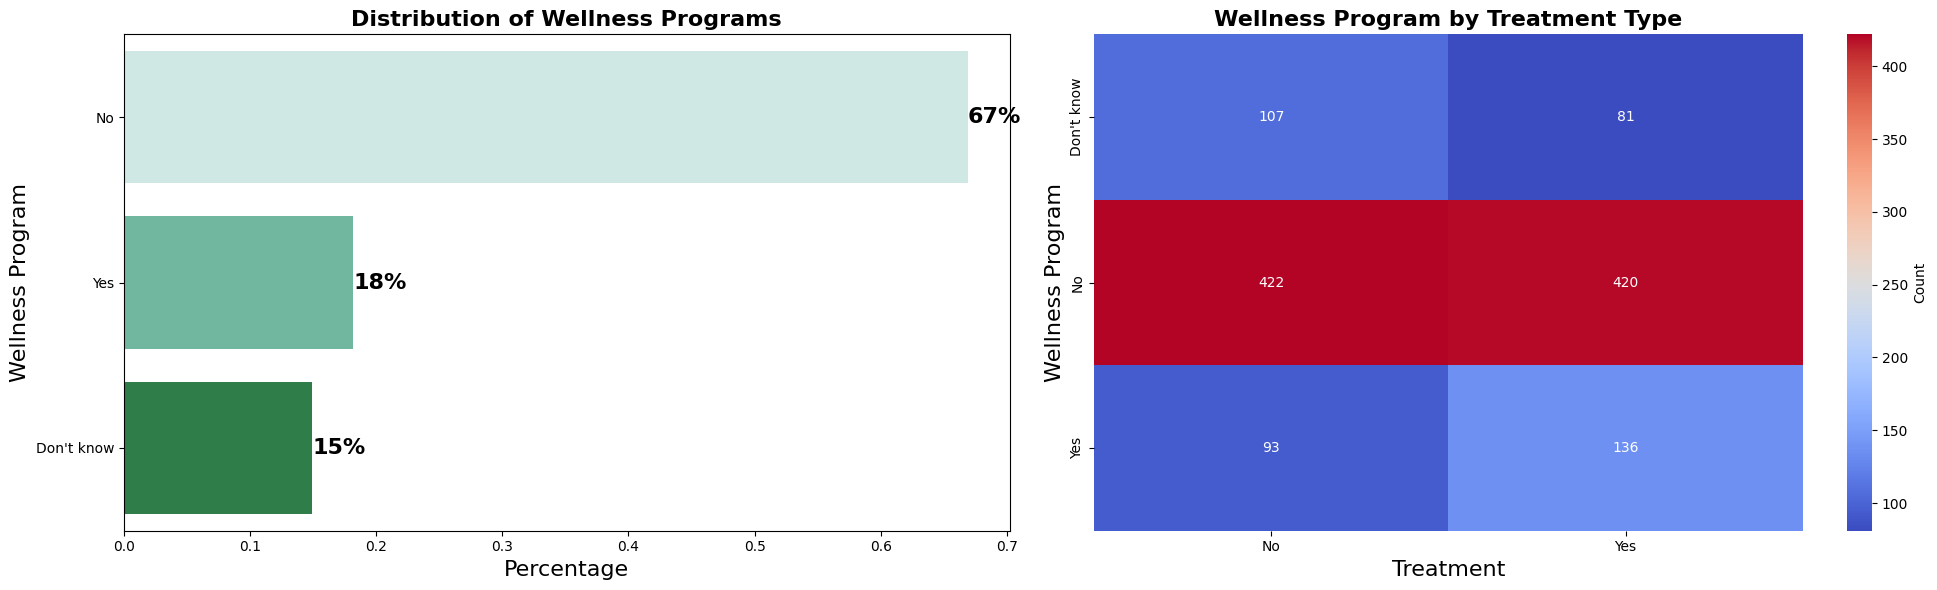

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the figure and axes
plt.figure(figsize=(20, 6))

# Horizontal Bar Plot
plt.subplot(1, 2, 1)
eda_percentage = data['wellness_program'].value_counts(normalize=True).rename_axis('wellness_program').reset_index(name='Percentage')
sns.barplot(x='Percentage', y='wellness_program', data=eda_percentage, palette='BuGn', orient='h')
for index, value in enumerate(eda_percentage['Percentage']):
    plt.text(value, index, f'{value:.0%}', va='center', ha='left', fontsize=16, fontweight='bold')
plt.title('Distribution of Wellness Programs', fontsize=16, fontweight='bold')
plt.xlabel('Percentage', fontsize=16)
plt.ylabel('Wellness Program', fontsize=16)

# Heatmap
plt.subplot(1, 2, 2)
wellness_counts = data.groupby(['wellness_program', 'treatment']).size().unstack()
sns.heatmap(wellness_counts, annot=True, cmap='coolwarm', fmt='d', cbar_kws={'label': 'Count'})
plt.title('Wellness Program by Treatment Type', fontsize=16, fontweight='bold')
plt.xlabel('Treatment', fontsize=16)
plt.ylabel('Wellness Program', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


Approximately 19% of respondents expressed interest in participating in an employee wellness program, with 60% of those interested seeking treatment. Alarmingly, more than 65% of respondents reported that their company does not provide any wellness programs. Nevertheless, nearly half of these individuals are still seeking treatment, indicating a pressing need for the company to fulfill its responsibility and implement such programs promptly.

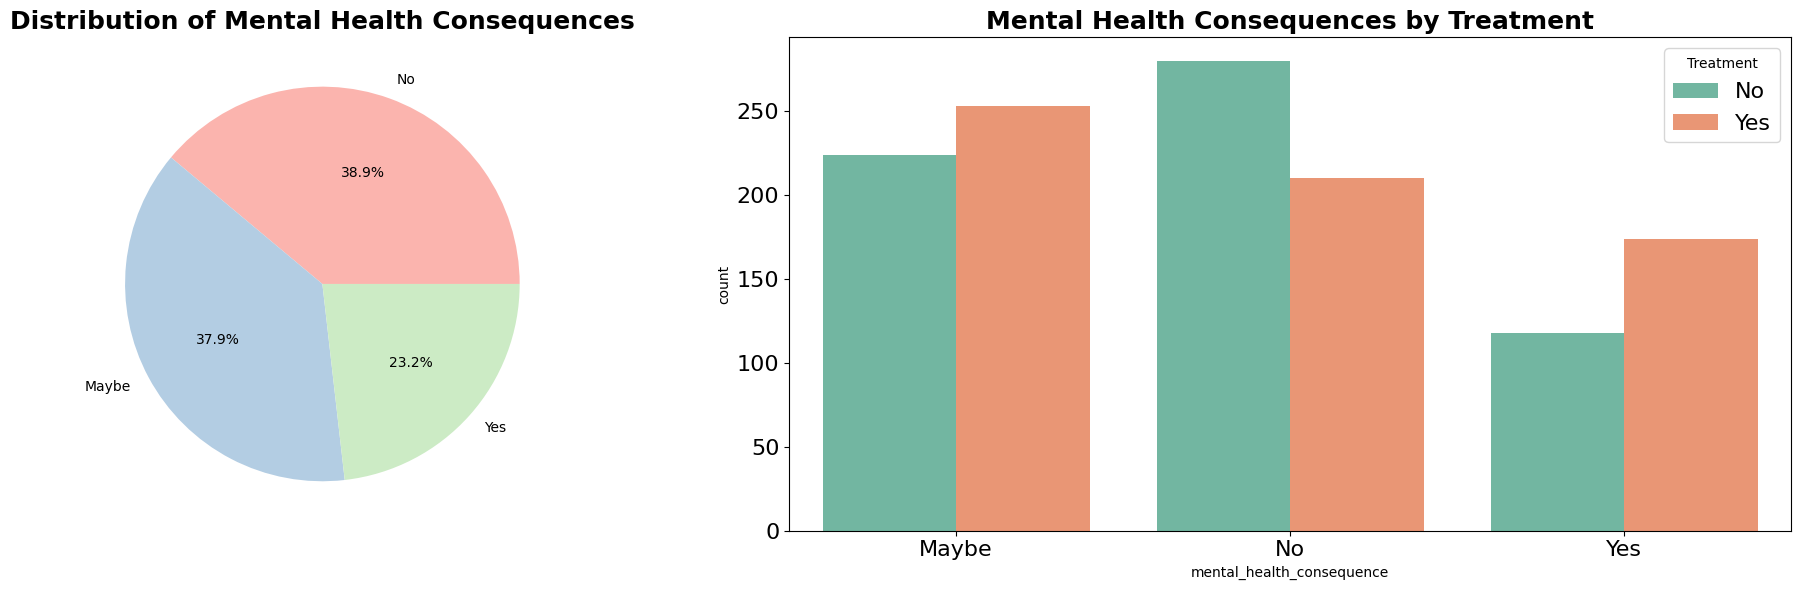

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(20, 6))

# Pie Chart for Distribution
plt.subplot(1, 2, 1)
eda_percentage = data['mental_health_consequence'].value_counts(normalize=True).rename_axis('mental_health_consequence').reset_index(name='Percentage')
plt.pie(eda_percentage['Percentage'], labels=eda_percentage['mental_health_consequence'], autopct='%1.1f%%', colors=sns.color_palette('Pastel1', len(eda_percentage)))
plt.title('Distribution of Mental Health Consequences', fontsize=18, fontweight='bold')

# Grouped Bar Chart
plt.subplot(1, 2, 2)
sns.barplot(x='mental_health_consequence', y='count', hue='treatment', data=data.groupby(['mental_health_consequence', 'treatment']).size().reset_index(name='count'), palette='Set2')
plt.title('Mental Health Consequences by Treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


Approximately 40% of respondents answered 'Maybe' and another 40% answered 'No' regarding the potential negative impact of discussing mental health issues with their employer, while about 23% answered 'Yes.' This 23% represents a notable portion of individuals who believe that such discussions could adversely affect their employer, possibly due to stigma, concerns about reduced productivity, impact on promotions, or other preconceived notions. It is noteworthy that among those who answered 'No,' only around 40% sought help, whereas more than 50% of individuals in the 'Maybe' and 'Yes' categories pursued medical assistance.

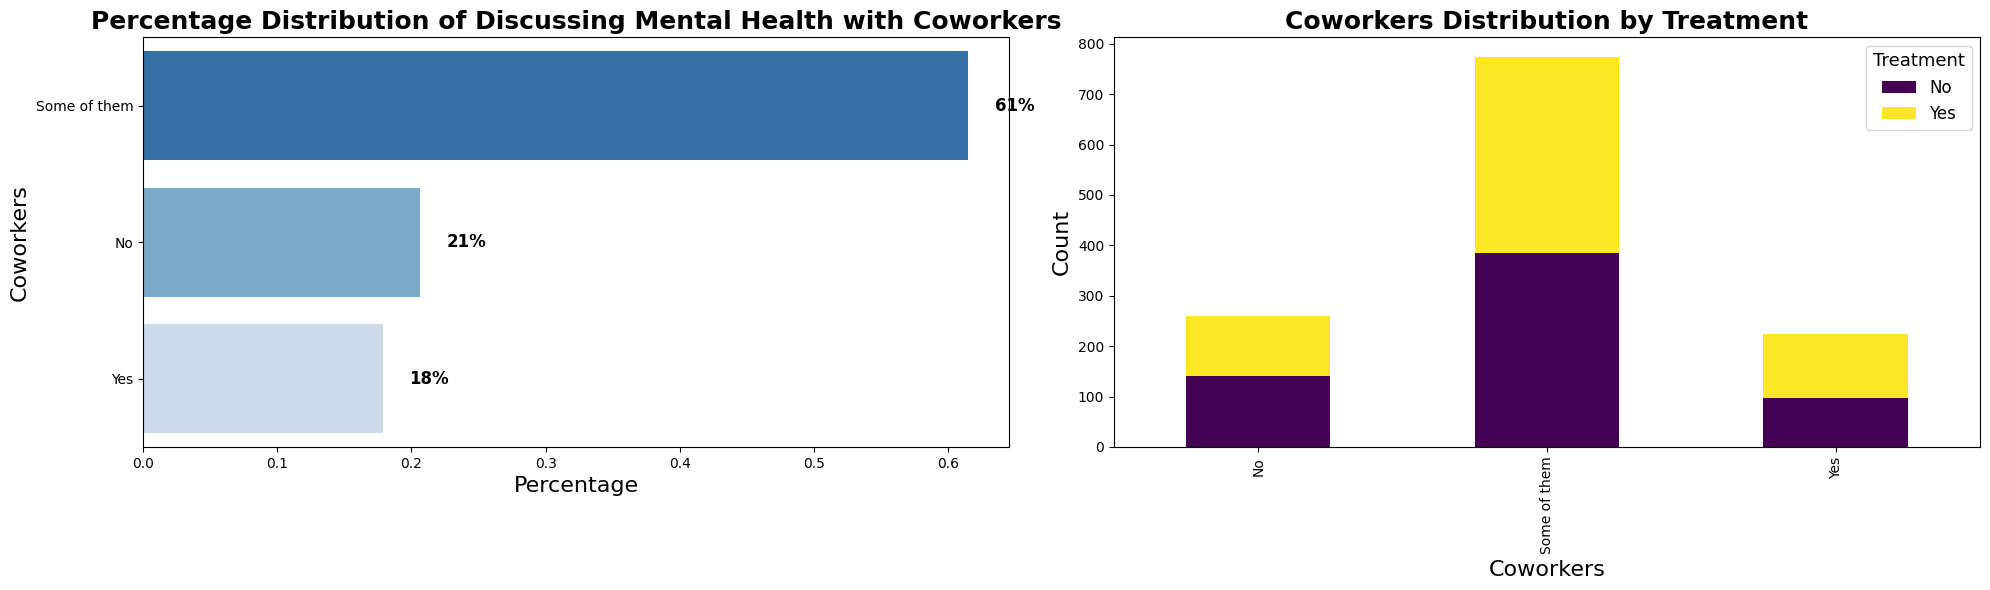

In [55]:
plt.figure(figsize=(20, 6))

# Subplot 1: Horizontal Barplot showing percentage distribution of 'coworkers'
plt.subplot(1, 2, 1)
eda_percentage = data['coworkers'].value_counts(normalize=True).rename_axis('coworkers').reset_index(name='Percentage')
sns.barplot(x='Percentage', y='coworkers', data=eda_percentage, palette='Blues_r')
for p in plt.gca().patches:
    width = p.get_width()
    plt.gca().annotate(f'{width:.0%}', (width + 0.02, p.get_y() + p.get_height()/2), 
                       ha='left', va='center', fontsize=12, fontweight='bold')

plt.title('Percentage Distribution of Discussing Mental Health with Coworkers', fontsize=18, fontweight='bold')
plt.xlabel('Percentage', fontsize=16)
plt.ylabel('Coworkers', fontsize=16)

# Subplot 2: Stacked Barplot showing the distribution of 'coworkers' with 'treatment'
plt.subplot(1, 2, 2)
coworker_treatment = data.groupby(['coworkers', 'treatment']).size().unstack().fillna(0)
coworker_treatment.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Coworkers Distribution by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Coworkers', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(title='Treatment', fontsize=12, title_fontsize='13')

plt.tight_layout()
plt.show()

Approximately 62% of employees indicated that they might be comfortable discussing certain mental health issues with their coworkers, and of these individuals, around 50% actually sought medical help. In contrast, 20% of employees felt that talking about mental health with coworkers was not a suitable option for them. Next, we will examine whether employees are comfortable sharing their mental health concerns with their supervisors.

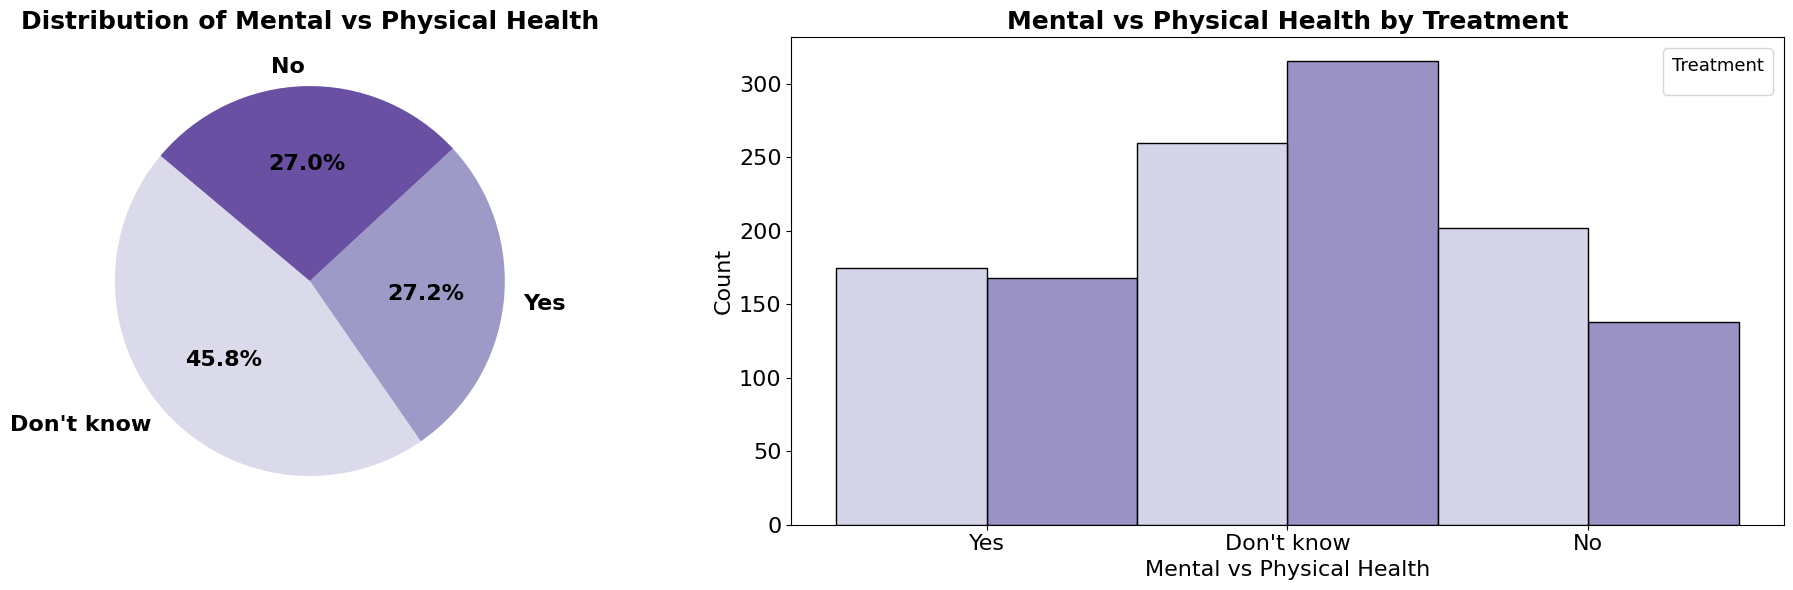

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

# Subplot 1: Pie Chart showing percentage distribution of 'mental_vs_physical'
plt.subplot(1, 2, 1)
eda_percentage = data['mental_vs_physical'].value_counts(normalize=True)
colors = sns.color_palette('Purples', len(eda_percentage))
plt.pie(eda_percentage, labels=eda_percentage.index, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 16, 'fontweight': 'bold'})
plt.title('Distribution of Mental vs Physical Health', fontsize=18, fontweight='bold')

# Subplot 2: Grouped Bar Plot showing the distribution of 'mental_vs_physical' with 'treatment' hue
plt.subplot(1, 2, 2)
sns.histplot(data, x='mental_vs_physical', hue='treatment', multiple='dodge', palette='Purples', binwidth=1)
plt.title('Mental vs Physical Health by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Mental vs Physical Health', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16, title_fontsize='13')

plt.tight_layout()
plt.show()


The response to the question, 'Do you think your employer treats mental health with the same seriousness as physical health?' showed that almost 50% of individuals were uncertain. The number of people who answered 'Yes' and those who answered 'No' were equal. More than 50% of those who answered either 'Yes' or 'No' had sought medical help for their mental health, unlike those who answered 'Don't know,' who did not seek such assistance.